In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/netflix_titles.csv')

df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [4]:
# Drop rows with too many missing values
df = df.dropna(subset=['director', 'cast', 'country'])

# Fill NA values
df.loc[:, 'rating'] = df['rating'].fillna('Not Rated')
df.loc[:, 'date_added'] = df['date_added'].ffill()


# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year



/tmp/ipython-input-5-1092356439.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


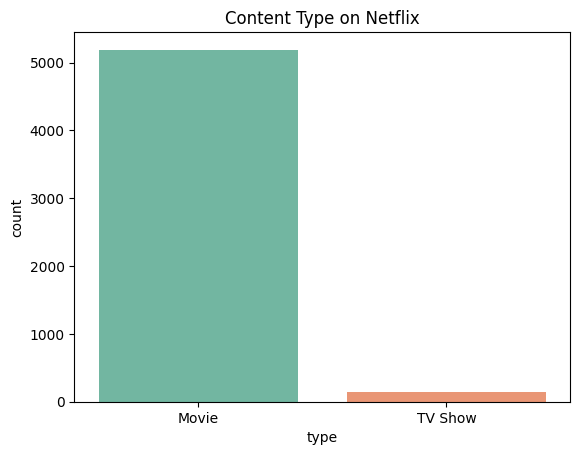

In [5]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type on Netflix')
plt.show()


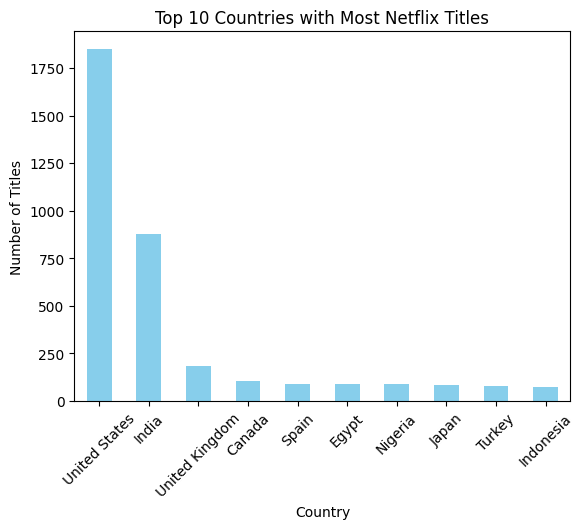

In [6]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


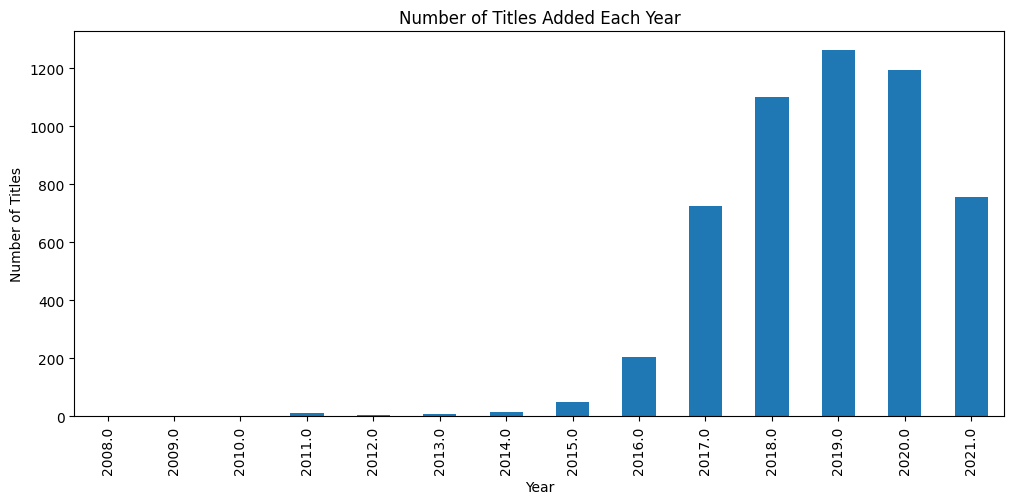

In [7]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


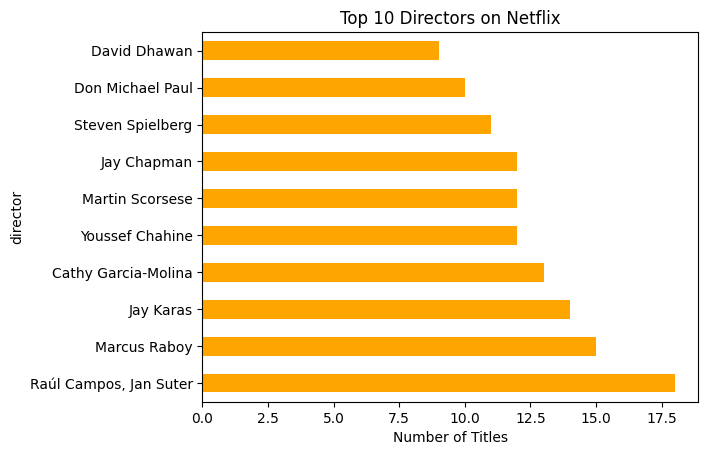

In [8]:
df['director'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.show()
